In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/7

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # !pip install xgboost if needed
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import mlflow
import joblib
import logging
import warnings
warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)

In [6]:
df = pd.read_csv("/content/cleaned_bank.csv")
logger.info(f"Loaded scaled data: {df.shape}")
df.head()

,job,education,default,housing,loan,day_of_week,month,y,dummy_telephone,dummy_nonexistent,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,896,10679,0,0,0,2,5,0,1,1,...,1.694589,0.386969,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,3452,8281,-1,0,0,2,5,0,1,1,...,1.797914,-0.412615,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,3452,8281,0,1,0,2,5,0,1,1,...,-0.268597,0.137099,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,9107,10679,0,0,0,2,5,0,1,1,...,0.041380,-0.398337,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,3452,8281,0,0,1,2,5,0,1,1,...,1.694589,0.715370,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


In [7]:
print("Target distribution:", df['y'].value_counts(normalize=True))  # Binary check (0/1)

Target distribution: y
0    0.919122
1    0.080878
Name: proportion, dtype: float64


In [8]:
# Assume X is scaled features, y is binary 'y' (subscription)
X = df.drop('y', axis=1)  # All scaled features
y = df['y']  # Binary target

In [9]:
# Ensure no missing
print("Missing values:", X.isnull().sum().sum())
if X.isnull().any().any():
    X.fillna(X.mean(), inplace=True)

logger.info("Features/Target prepared")

Missing values: 0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logger.info(f"Train: {X_train.shape}, Test: {X_test.shape}")

In [12]:
# Explore Binary Classification Algorithms
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [13]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    # CV score
    cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    results[name] = {
        'Accuracy': acc,
        'CV Accuracy': cv_acc,
        'AUC': auc,
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"\n{name}:")
    print(f"Test Accuracy: {acc:.4f}, CV Accuracy: {cv_acc:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

logger.info("All models trained and evaluated")


Logistic Regression:
Test Accuracy: 0.9305, CV Accuracy: 0.9350, AUC: 0.9247
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6532
           1       0.62      0.38      0.47       575

    accuracy                           0.93      7107
   macro avg       0.78      0.68      0.71      7107
weighted avg       0.92      0.93      0.92      7107


Random Forest:
Test Accuracy: 0.9360, CV Accuracy: 0.9394, AUC: 0.9453
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6532
           1       0.64      0.47      0.54       575

    accuracy                           0.94      7107
   macro avg       0.80      0.72      0.75      7107
weighted avg       0.93      0.94      0.93      7107


SVM:
Test Accuracy: 0.9191, CV Accuracy: 0.9191, AUC: 0.5932
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6532
           1       0.00  

In [14]:
# Comparison Table and Plot
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'CV Accuracy': [results[m]['CV Accuracy'] for m in results],
    'AUC': [results[m]['AUC'] for m in results]
})
print("\nModel Comparison:")
display(comparison_df)


Model Comparison:


,Model,Accuracy,CV Accuracy,AUC
0,Logistic Regression,0.930491,0.934994,0.924651
1,Random Forest,0.935979,0.939426,0.945271
2,SVM,0.919094,0.919129,0.593242
3,XGBoost,0.931476,0.937421,0.947047
4,KNN,0.925988,0.924828,0.832926


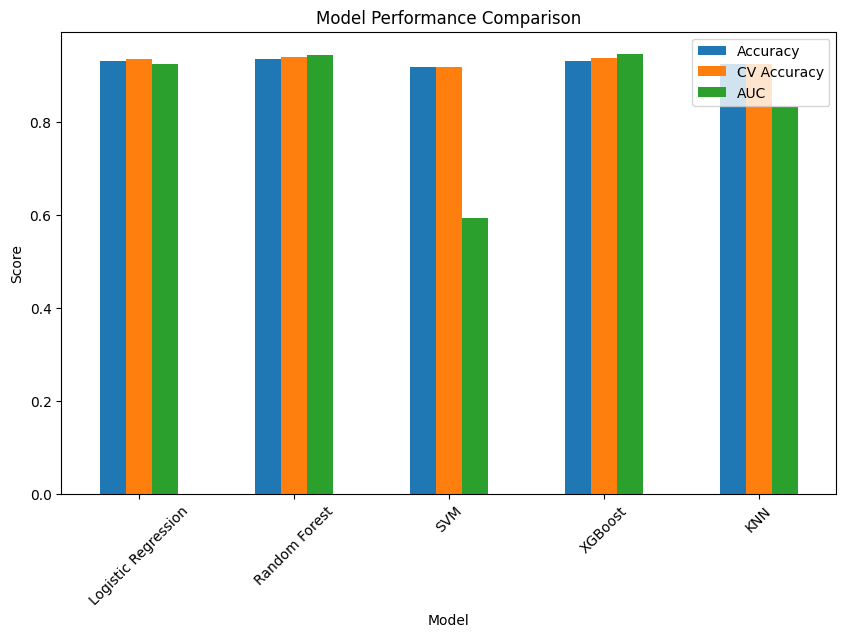

In [15]:
# Plot
comparison_df.plot(x='Model', y=['Accuracy', 'CV Accuracy', 'AUC'], kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Best model
best_model_name = comparison_df.loc[comparison_df['AUC'].idxmax(), 'Model']  # AUC for balance
best_model = models[best_model_name]
logger.info(f"Best model: {best_model_name} (by AUC)")

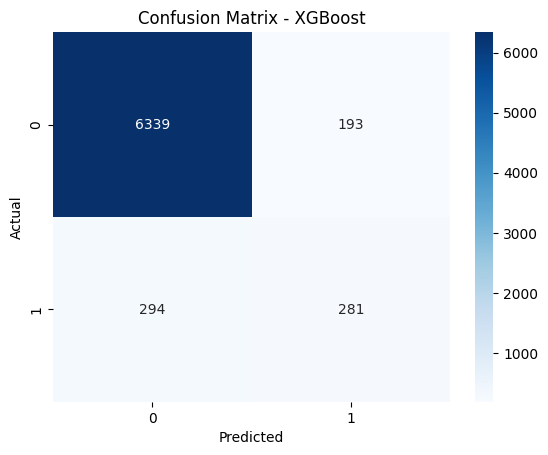

In [17]:
# Confusion Matrix for Best Model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

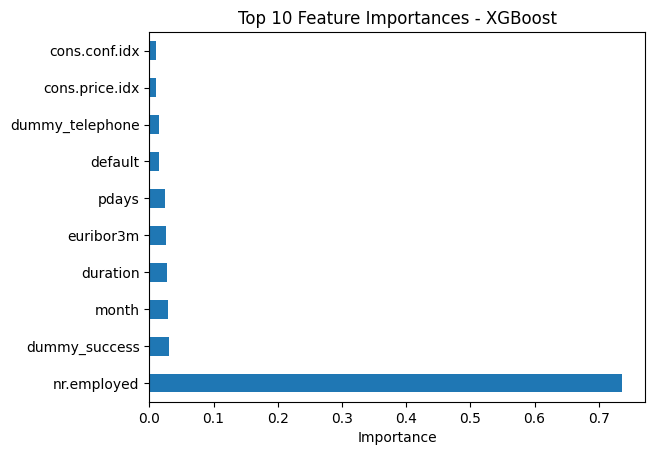

Top features: nr.employed      0.735731
dummy_success    0.031327
month            0.028390
duration         0.026916
euribor3m        0.026141
dtype: float32


In [18]:
# Feature Importances (for Tree-Based Models)
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
    importances.plot(kind='barh')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.show()
    print("Top features:", importances.head())

In [19]:
# MLflow Logging and Save
mlflow.start_run()
mlflow.log_param("best_model", best_model_name)
mlflow.log_metric("accuracy", comparison_df['Accuracy'].max())
mlflow.log_metric("auc", comparison_df['AUC'].max())
mlflow.sklearn.log_model(best_model, "baseline_model")
mlflow.end_run()

joblib.dump(best_model, 'baseline_model.pkl')
logger.info("Model logged to MLflow and saved")

2025/09/17 12:27:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/17 12:28:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [20]:
success_rate = y.mean()
print(f"Baseline subscription rate: {success_rate:.2%}")
print(f"Model improvement: {comparison_df['Accuracy'].max() - success_rate:.2%}")

Baseline subscription rate: 8.09%
Model improvement: 85.51%


In [21]:
example_features = X_test.iloc[0:1]  # First test sample
pred_prob = best_model.predict_proba(example_features)[:, 1][0]
print(f"Sample prediction prob: {pred_prob:.2%} - {'High ROI' if pred_prob > 0.5 else 'Low ROI'}")
logger.info("Baseline notebook complete")

Sample prediction prob: 0.01% - Low ROI
